# Complexity Measures

This notebooks runs complexity metrics on time series signals. 

This notebook includes:
- Hjorth parameters
- Lempel-Ziv complexity
- Fractal dimension measures

Note that while entropy measures can be considered as mesaured of complexity, they are considered in a separate notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed
from neurodsp.aperiodic.conversions import convert_exponent_hfd

from antropy import lziv_complexity

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.core.db import APMDB
from apm.methods import (hjorth_activity, hjorth_mobility, hjorth_complexity, 
                         lempelziv, higuchi_fd, petrosian_fd, katz_fd, sevcik_fd)
from apm.methods.settings import LZ_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.sim.settings import SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


## Settings

In [3]:
# Set the random seed
set_random_seed(111)

In [4]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '15_complexity'

## Hjorth Parameters 

Hjorth parameters are statistical properties that can be used to characterize EEG data.

The Hjorth measures are:
- activity: represents the signal power, computed as the variance of the time series
- mobility: represents the mean frequency of the power spectrum
- complexity: represents the change in frequency

### Compute Hjorth Parameters on Examples Signals

Note that the simulated signals are normalized to a variance of one, which is why the Hjorth activity is the same for all.

#### Powerlaw Signal

In [5]:
# Check the calculated Hjorth activity values across some example signals
print('Computed Hjorth activity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_activity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_activity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_activity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_activity(SIG_KN)))

Computed Hjorth activity:
  powerlaw: 	 1.0000
  osc:      	 1.0000
  combined: 	 1.0000
  knee:     	 1.0000


In [6]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth mobility:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_mobility(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_mobility(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_mobility(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_mobility(SIG_KN)))

Computed Hjorth mobility:
  powerlaw: 	 0.1619
  osc:      	 0.0628
  combined: 	 0.2423
  knee:     	 0.4431


In [7]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth complexity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_complexity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_complexity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_complexity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_complexity(SIG_KN)))

Computed Hjorth complexity:
  powerlaw: 	 9.0791
  osc:      	 1.0001
  combined: 	 6.0103
  knee:     	 3.2606


### Hjorth Parameters: Aperiodic Variations

In [8]:
# Run a set of simulations, calculating Hjorth measures across exponents
hjm_sims_exp, hjm_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_mobility, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
hjc_sims_exp, hjc_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_complexity, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [9]:
# Run a set of simulations, calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb, hjm_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
hjc_sims_comb, hjc_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


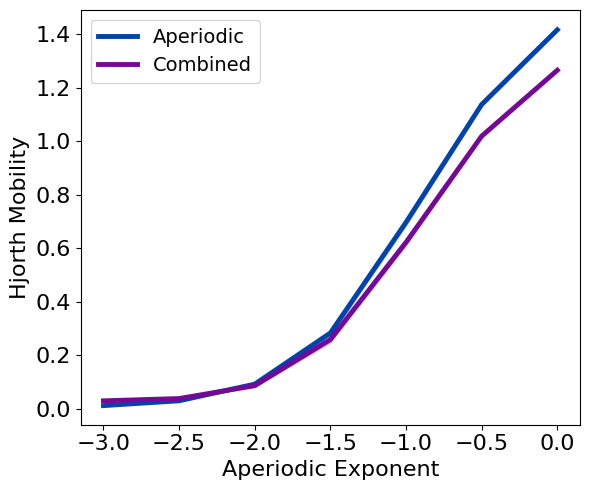

In [10]:
# Plot Hjorth mobility estimates across aperiodic variations
plot_ap_sims(hjm_sims_exp, hjm_sims_exp_var, hjm_sims_comb, hjm_sims_comb_var,
             'Hjorth Mobility', save_fig=SAVE_FIG, file_name='hjm_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


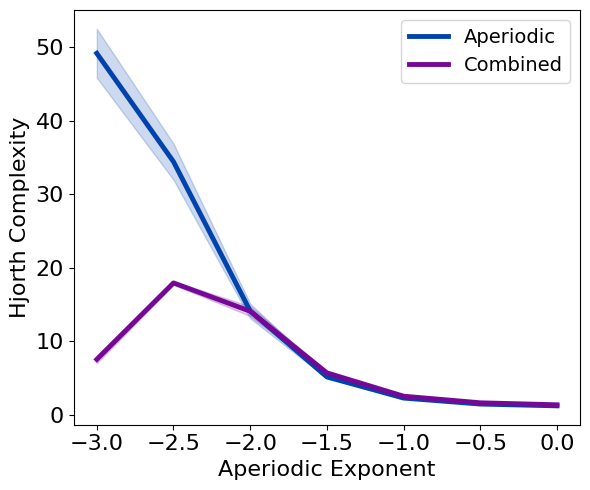

In [11]:
# Plot Hjorth complexity estimates across aperiodic variations
plot_ap_sims(hjc_sims_exp, hjc_sims_exp_var, hjc_sims_comb, hjc_sims_comb_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_ap' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Periodic Variations

In [12]:
# Run a set of simulations, calculating Hjorth estimates across oscillation frequency
hjm_sims_freq, hjm_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
hjc_sims_freq, hjc_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [13]:
# Run a set of simulations, calculating Hjorth estimates across oscillation power
hjm_sims_pow, hjm_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
hjc_sims_pow, hjc_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


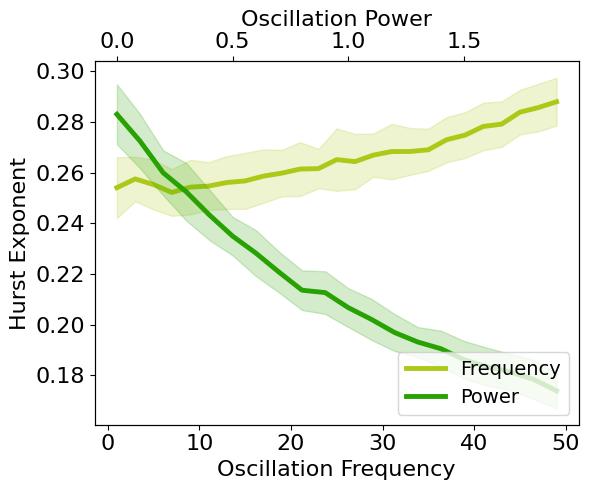

In [14]:
# Plot Hjorth mobility estimates across periodic variations
plot_pe_sims(hjm_sims_freq, hjm_sims_freq_var, hjm_sims_pow, hjm_sims_pow_var,
             'Hurst Exponent', save_fig=SAVE_FIG, file_name='hjm_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


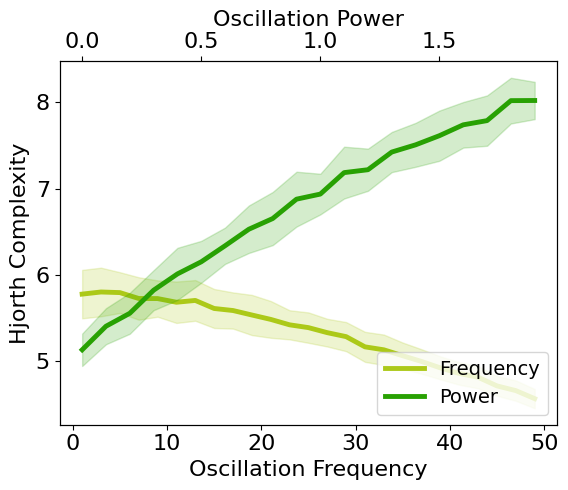

In [15]:
# Plot Hjorth complexity estimates across periodic variations
plot_pe_sims(hjc_sims_freq, hjc_sims_freq_var, hjc_sims_pow, hjc_sims_pow_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_pe' + EXT, file_path=FIGPATH)

## Lempel-Ziv Complexity

Lempel-Ziv (LZ) complexity is a measure of the complexity of a time series that is sometimes applied to EEG data. 

Note that the LZ algorithm is defined for binary sequences. 

To apply this measure to neural time series, we binarize the signal by calculating whether each point is above or below the median of the time series.

In [16]:
# Check Lempel-Ziv complexity parameters
LZ_PARAMS

{'normalize': False}

In [17]:
# Example of applying LZ complexity to a binarized signal
bin_sig = np.array(SIG_AP > np.median(SIG_AP)).astype(int)
lziv_complexity(bin_sig)

394

### Calculating Lempel-Ziv Complexity on Example Signals

In [18]:
# Check Lempel-Ziv complexity measures on example signals
print('Lempel-Ziv complexity:')
print('  powerlaw: \t {:5d}'.format(lempelziv(SIG_AP, **LZ_PARAMS)))
print('  osc:      \t {:5d}'.format(lempelziv(SIG_OSC, **LZ_PARAMS)))
print('  combined: \t {:5d}'.format(lempelziv(SIG_COMB, **LZ_PARAMS)))
print('  knee:     \t {:5d}'.format(lempelziv(SIG_KN, **LZ_PARAMS)))

Lempel-Ziv complexity:
  powerlaw: 	   394
  osc:      	     5
  combined: 	   696
  knee:     	  1141


### Aperiodic Variations

In [19]:
# Run a set of simulations, calculating LZ complexity across exponents
lz_sims_exp, lz_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, lempelziv, LZ_PARAMS,
    'update_exp', EXPS, N_SIMS, var_func=np.std)

# Run a set of simulations, calculating LZ complexity across exponents with an oscillation
lz_sims_comb, lz_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS,
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


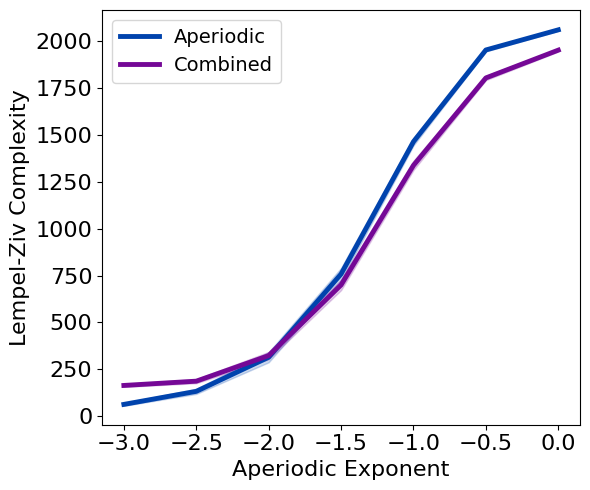

In [20]:
# Plot Lempel-Ziv complexity estimates across aperiodic variations
plot_ap_sims(lz_sims_exp, lz_sims_exp_var, lz_sims_comb, lz_sims_comb_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [21]:
# Run a set of simulations, calculating LZ complexity across oscillation frequency
lz_sims_freq, lz_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [22]:
# Run a set of simulations, calculating fractal dimension across oscillation power
lz_sims_pow, lz_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


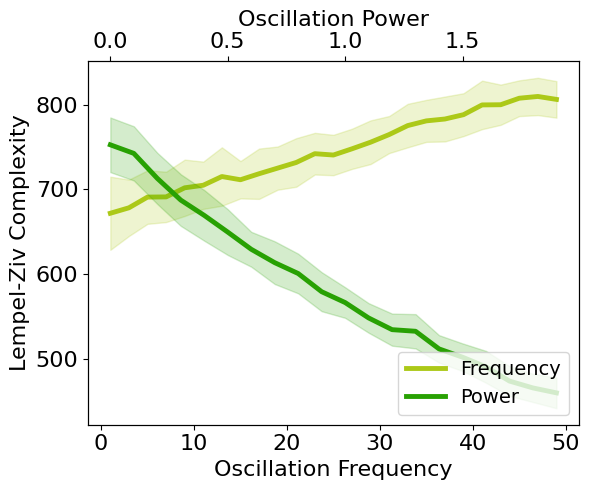

In [23]:
# Plot Lempel-Ziv complexity estimates across periodic variations
plot_pe_sims(lz_sims_freq, lz_sims_freq_var, lz_sims_pow, lz_sims_pow_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_pe' + EXT, file_path=FIGPATH)

## Fractal Dimensions

Calculate measures of fractal dimension on time series. 

Fractal dimension measures:
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

### Calculating Fractal Dimension on Example Signals

In [24]:
# Check Higuchi fractal dimension measures on example signals
print('Higuchi fractal dimension:')
print('  powerlaw: \t {:1.4f} \t {:1.2f}'.format(higuchi_fd(SIG_AP), convert_exponent_hfd(EXP)))
print('  osc:      \t {:1.4f}'.format(higuchi_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(higuchi_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(higuchi_fd(SIG_KN)))

Higuchi fractal dimension:
  powerlaw: 	 1.6550 	 1.75
  osc:      	 1.0069
  combined: 	 1.6115
  knee:     	 1.5925


In [25]:
# Check Katz fractal dimension measures on example signals
print('Katz fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(katz_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(katz_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(katz_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(katz_fd(SIG_KN)))

Katz fractal dimension:
  powerlaw: 	 3.1581
  osc:      	 3.2026
  combined: 	 3.1864
  knee:     	 4.1521


In [26]:
# Check Petrosian fractal dimension measures on example signals
print('Petrosian fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(petrosian_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(petrosian_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(petrosian_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(petrosian_fd(SIG_KN)))

Petrosian fractal dimension:
  powerlaw: 	 1.0189
  osc:      	 1.0008
  combined: 	 1.0186
  knee:     	 1.0185


In [27]:
# Check Sevcik fractal dimension measures on example signals
print('Sevcik fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(sevcik_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(sevcik_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(sevcik_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(sevcik_fd(SIG_KN)))

Sevcik fractal dimension:
  powerlaw: 	 1.5897
  osc:      	 1.5814
  combined: 	 1.6059
  knee:     	 1.6532


### Fractal Dimension: Aperiodic Variations

In [28]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_exp, hfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, higuchi_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
kfd_sims_exp, kfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, katz_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
pfd_sims_exp, pfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, petrosian_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
sfd_sims_exp, sfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, sevcik_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [29]:
# Run a set of simulations, calculating fractal dimension across exponents with an oscillation
hfd_sims_comb, hfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
kfd_sims_comb, kfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
pfd_sims_comb, pfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
sfd_sims_comb, sfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


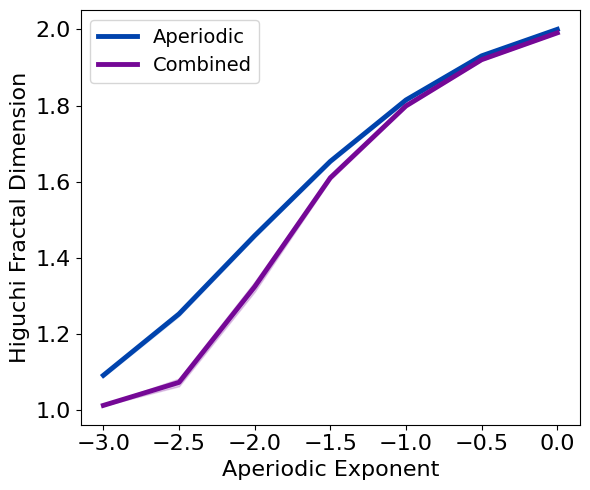

In [30]:
# Plot Higuchi fractal dimension estimates across aperiodic variations
plot_ap_sims(hfd_sims_exp, hfd_sims_exp_var, hfd_sims_comb, hfd_sims_comb_var,
             'Higuchi Fractal Dimension', save_fig=SAVE_FIG, file_name='hfd_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


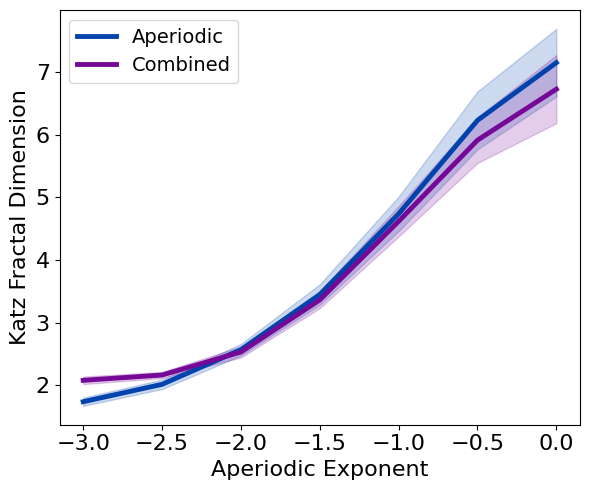

In [31]:
# Plot Katz fractal dimension estimates across aperiodic variations
plot_ap_sims(kfd_sims_exp, kfd_sims_exp_var, kfd_sims_comb, kfd_sims_comb_var,
             'Katz Fractal Dimension', save_fig=SAVE_FIG, file_name='kfd_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


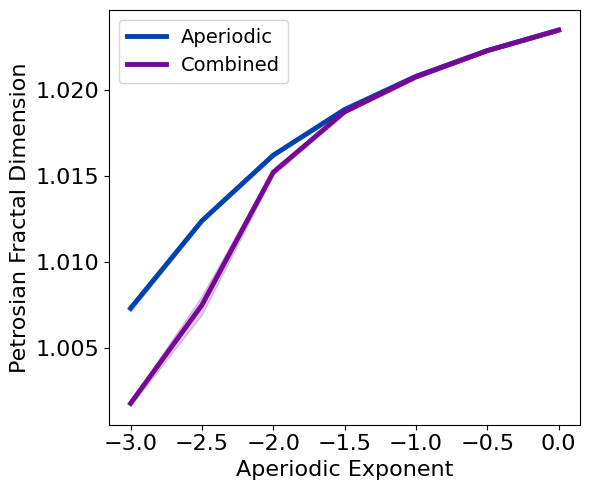

In [32]:
# Plot Petrosian fractal dimension estimates across aperiodic variations
plot_ap_sims(pfd_sims_exp, pfd_sims_exp_var, pfd_sims_comb, pfd_sims_comb_var,
             'Petrosian Fractal Dimension', save_fig=SAVE_FIG, file_name='pfd_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


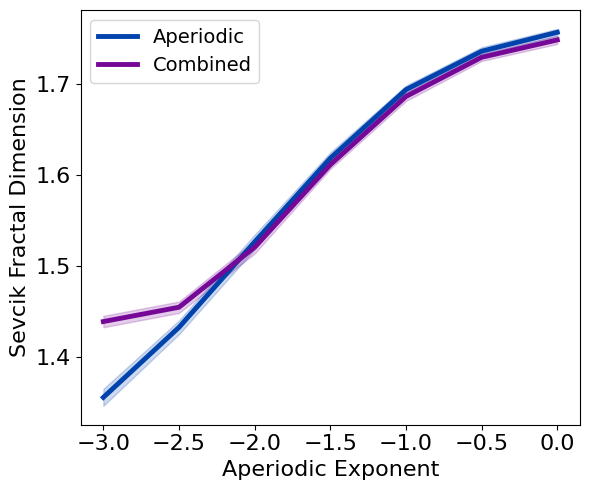

In [33]:
# Plot Sevcik fractal dimension estimates across aperiodic variations
plot_ap_sims(sfd_sims_exp, sfd_sims_exp_var, sfd_sims_comb, sfd_sims_comb_var,
             'Sevcik Fractal Dimension', save_fig=SAVE_FIG, file_name='sfd_ap' + EXT, file_path=FIGPATH)

### Fractal Dimension: Periodic Variations

In [34]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hfd_sims_freq, hfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
kfd_sims_freq, kfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
pfd_sims_freq, pfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
sfd_sims_freq, sfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [35]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hfd_sims_pow, hfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
kfd_sims_pow, kfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
pfd_sims_pow, pfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
sfd_sims_pow, sfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


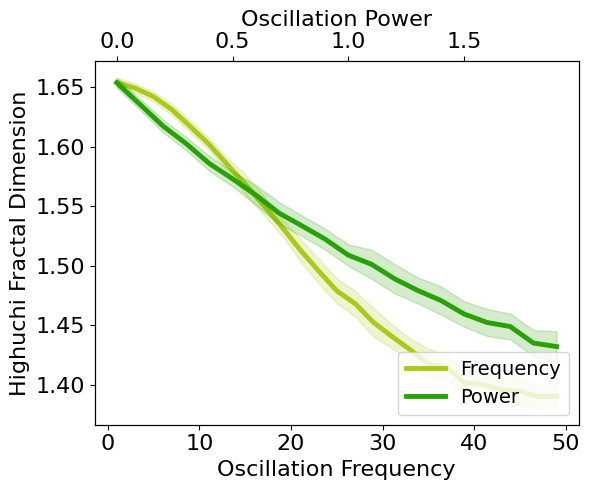

In [36]:
# Plot Higuchi fractal dimension estimates across periodic variations
plot_pe_sims(hfd_sims_freq, hfd_sims_freq_var, hfd_sims_pow, hfd_sims_pow_var,
             'Highuchi Fractal Dimension', save_fig=SAVE_FIG, file_name='hfd_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


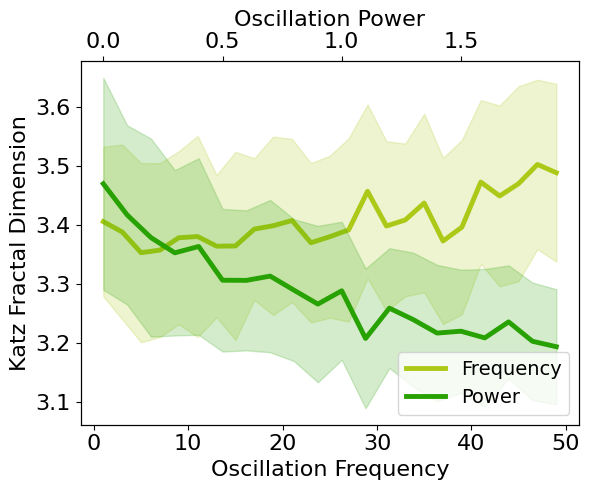

In [37]:
# Plot Katz fractal dimension estimates across periodic variations
plot_pe_sims(kfd_sims_freq, kfd_sims_freq_var, kfd_sims_pow, kfd_sims_pow_var,
             'Katz Fractal Dimension', save_fig=SAVE_FIG, file_name='kfd_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


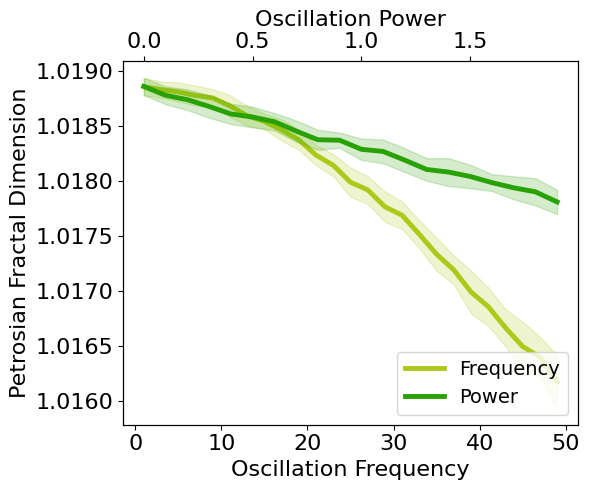

In [38]:
# Plot Petrosian fractal dimension estimates across periodic variations
plot_pe_sims(pfd_sims_freq, pfd_sims_freq_var, pfd_sims_pow, pfd_sims_pow_var,
             'Petrosian Fractal Dimension', save_fig=SAVE_FIG, file_name='pfd_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


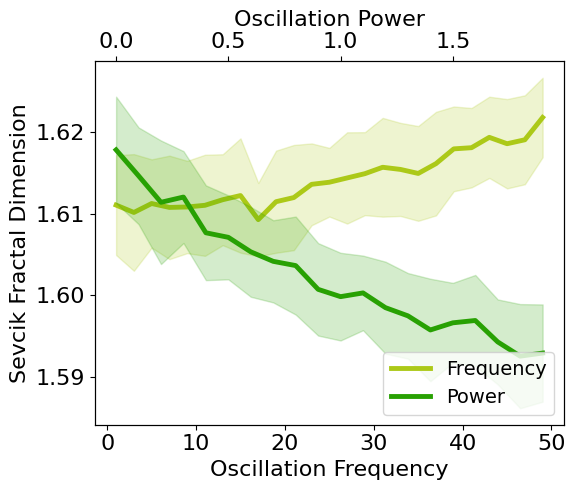

In [39]:
# Plot Sevcik fractal dimension estimates across periodic variations
plot_pe_sims(sfd_sims_freq, sfd_sims_freq_var, sfd_sims_pow, sfd_sims_pow_var,
             'Sevcik Fractal Dimension', save_fig=SAVE_FIG, file_name='sfd_pe' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Hjorth Parameters:
- mobility increases with decreasing aperiodic exponent (non-linearly) & increases with oscillation frequency & power
- complexity decreases with decreasing aperiodic exponent (non-linearly) & decreases with oscillation frequency & power

Lempel-Ziv Complexity:
- increases with decreasing aperiodic exponent, non-linearly
- increases with increasing oscillation frequency, approximately linearly
- decreases with increasing oscillation power, approximately linearly

Fractal dimension measures (general patterns, across all three):
- increase with decreasing aperiodic exponent, non-linearly
- decreases with increasing oscillations frequency or power, mixed patterns